# Importing Libraries and Basic EDA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Loading the data**

In [2]:
#Loading training and test data
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')

#Displaying top 5 rows of the data
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


In [3]:
#Getting some statistical insights 
heart_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,212.0,54.561321,9.493376,29.0,47.00,57.00,61.25,77.0
sex,212.0,0.688679,0.464130,0.0,0.00,1.00,1.00,1.0
cp,212.0,0.915094,1.008193,0.0,0.00,1.00,2.00,3.0
trestbps,212.0,132.127358,17.440700,94.0,120.00,130.00,140.00,192.0
chol,212.0,247.830189,53.199877,126.0,211.75,240.50,277.00,564.0
fbs,212.0,0.165094,0.372144,0.0,0.00,0.00,0.00,1.0
restecg,212.0,0.537736,0.527437,0.0,0.00,1.00,1.00,2.0
thalach,212.0,148.995283,23.332645,71.0,132.00,151.50,165.25,202.0
exang,212.0,0.330189,0.471394,0.0,0.00,0.00,1.00,1.0
oldpeak,212.0,1.008491,1.141681,0.0,0.00,0.65,1.60,5.6


In [4]:
#Getting some information on the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


# Preparing the data to feed it to a ML model

In [5]:
#Creating age group in the dataset
bins_age = [18, 30, 40, 50, 65, 120]
labels_age = ['18-29', '30-39', '40-49', '50-65', '65+']
heart_data['age_group'] = pd.cut(heart_data.age, bins_age, labels = labels_age,include_lowest = True)

test_data['age_group']= pd.cut(test_data.age, bins_age, labels = labels_age,include_lowest = True)

#Removing the age column
heart_data.drop(columns=['age'], axis=1, inplace= True)
test_data.drop(columns= ['age'], axis=1, inplace= True)

In [6]:
#Separating Feature and Target variable
X= heart_data.drop(columns= ['target'], axis= 1)
y= heart_data['target']

X.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_group
0,1,2,124,255,1,1,175,0,0.0,2,2,2,40-49
1,0,2,120,211,0,0,115,0,1.5,1,0,2,65+
2,1,0,120,249,0,0,144,0,0.8,2,0,3,40-49
3,1,0,130,253,0,1,144,1,1.4,2,1,3,50-65
4,1,0,115,303,0,1,181,0,1.2,1,0,2,40-49


In [7]:
#One Hot encoding the age group column 
X= pd.get_dummies(X)
test_data= pd.get_dummies(test_data)

In [8]:
#Spliting dataset into training and validation set
import random
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state= 0)

In [9]:
X_train.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_group_18-29,age_group_30-39,age_group_40-49,age_group_50-65,age_group_65+
16,1,0,150,270,0,0,111,1,0.8,2,0,3,0,0,0,1,0
135,0,0,110,254,0,0,159,0,0.0,2,0,2,0,0,1,0,0
122,1,0,112,230,0,1,160,0,0.0,2,1,2,0,0,0,1,0
22,1,2,160,269,0,1,112,1,2.9,1,1,3,0,0,0,0,1
80,0,2,110,214,0,1,158,0,1.6,1,0,2,0,0,0,1,0


#Creating and Training ML model

In [10]:
from sklearn.linear_model import LogisticRegression

LogReg= LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
from sklearn.metrics import f1_score

y_pred= LogReg.predict(X_test)
f1_score(y_pred, y_test)

0.8627450980392156

#Shap

In [12]:
#Installing shap
!pip install shap

**Finding Shapley values of all the features for Logistic Regression Model**

In [13]:
#Creating Shap Explainer and getting shap values
import shap

# Computing the SHAP values for the linear model
Explainer = shap.KernelExplainer(LogReg.predict, X_train)
LogReg_shap_values= Explainer.shap_values(X_test)
shap_value_df= pd.DataFrame(LogReg_shap_values, columns=X_test.columns)


Using 169 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [14]:
shap_value_df.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_group_18-29,age_group_30-39,age_group_40-49,age_group_50-65,age_group_65+
0,-0.015014,0.162330,-0.014794,0.000000,-0.007822,-0.040182,0.080461,0.066525,0.068841,0.044197,0.051463,0.066083,0.0,0.000000,0.000000,0.000000,-0.006468
1,0.051778,0.115876,0.006461,0.000000,0.000000,-0.032440,-0.077867,0.049912,0.053006,0.028392,0.040214,0.214915,0.0,0.002322,0.000000,0.003052,0.000000
2,0.058960,0.048118,0.001158,0.008667,0.000000,0.039117,0.082800,0.067463,0.001941,0.041413,0.043614,0.057437,0.0,0.000000,0.002008,0.002924,0.000000
3,-0.015078,0.046801,0.046377,0.000000,0.002042,0.040878,0.040573,0.073521,0.069254,0.045460,0.047416,0.058375,0.0,0.000000,0.000000,0.000000,0.000000
4,-0.023477,0.476806,-0.117784,0.000000,0.000000,-0.065433,0.063280,0.108274,0.067934,-0.024149,0.081448,-0.102470,0.0,0.000000,-0.008808,0.000000,0.000000


**Inference from the shap values**</br>
These values shown in the dataframe above shows the affect of each feature for each row of data i.e. explaining the affect of each feature for that particular instance which is also known as Local Interpretability. And, to find out global interpretability, We just have to take the mean of the values across each columns and we'll get inportance of each and every feature.

**Plotting a Shap Force Plot for first row of test_data**

In [15]:
shap.initjs()
shap.force_plot(Explainer.expected_value, LogReg_shap_values[0, :], X_test.iloc[0, :])

**Inference From the above plot**</br>
This plot shows the reason behind its prediction.</br>
From the above plot , We can interpret which feature is contributing in which way. The features in pink are driving the prediction towards positive i.e Heart Disease present(target=1) and the features in blue are driving the prediction towards positive i.e Heart Disease not present(target=0).

**Force plot for all rows of data**

In [16]:
shap.force_plot(Explainer.expected_value, LogReg_shap_values, X_test)

**Inference From the above plot**</br>
Each observation has its own force plot. If all the force plots are combined, rotated 90 degrees and stacked horizontally, we get the force plot of the entire data X_test.The above Y-axis is the X-axis of the individual force plot. There are 43 data points in our X_test, so the X-axis has 43 observations.

**Ploting a shap summary plot for all the features**

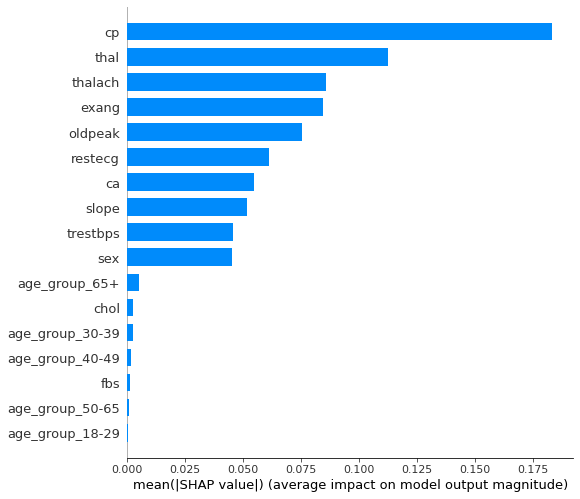

In [17]:
shap.summary_plot(LogReg_shap_values, X_test, plot_type='bar')

**Inference From the above plot**</br>
The above plot shows the global interpretability of the model as it shows the importance of each feature throughout the dataset. The above plot shows that the most important feature is cp i.e. Chest pressure.

**Plotting a dependence plot to show the the effect of 'chol' across the dataset**

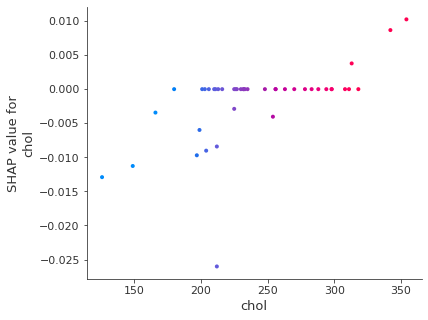

In [18]:
shap.dependence_plot(ind='chol', interaction_index='chol',
                     shap_values=LogReg_shap_values, 
                     features=X_test,  
                     display_features=X_test)

# Training a Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RFC= RandomForestClassifier(random_state= 42)
params= {
    'bootstrap': [True],
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 200, 300, 400],
}

model= GridSearchCV(RFC, params, cv=3, n_jobs= -1, verbose=2)
model.fit(X_train, y_train)
model.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  2.1min finished


{'bootstrap': True,
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [20]:
RF_model= RandomForestClassifier(max_depth= 5, bootstrap= True,
                                 min_samples_leaf= 3, min_samples_split= 2,
                                 n_estimators= 300, random_state= 42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [21]:
y_pred_train= model.predict(X_train)
f1_score(y_pred_train, y_train)

0.9347826086956522

In [22]:
y_pred= model.predict(X_test)
f1_score(y_pred, y_test)

0.8749999999999999

In [23]:
prediction= RF_model.predict(test_data)
predicted_data= pd.DataFrame(prediction, columns=['prediction'])
predicted_data.to_csv('predictions_RF.csv', index=False)

In [24]:
prediction_LR= LogReg.predict(test_data)
predicted_data_LR= pd.DataFrame(prediction_LR, columns=['prediction'])
predicted_data_LR.to_csv('predictions_LR.csv', index= False)